1. Import jeopardy.csv and create a dataframe from the data. Find out the following:
a. How many rows are there in the dataframe? What does a row represent in this
dataset? What is the “grain”?
b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?
c. How many unique shows were there each year?
d. How many times was each category used?
e. Which month (over the years) has had the most shows?
f. Are there any answers that appeared multiple times? Find the questions for the top
three most common answers.
2. Create a visualization that shows the top 5 categories (those referenced the most often). Be
sure to label appropriately.

In [97]:
import pandas as pd
import numpy as np
import datetime
text_file=pd.read_csv('JEOPARDY_CSV.csv',index_col=False)
jeo_df=pd.DataFrame(text_file)

In [147]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',10)

In [99]:
jeo_df

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


a. 216930 rows and 7 columns in the dataframe. 
Rows represent information about a show information like their airdata,category they below to.
Grain here represets the occurance of the show telecasted at particular day.

b.Data in the dataframe is 80% tidy but 20% untidy. To make 100% tidy data.
Hence converting the AirDate column to datetime type and the value column for integer/float type.
*didnot check for the duplicate rows.

In [101]:
#1.Renameing the column names by removing spaces.
jeo_df.columns 

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [134]:
jeo_df.rename(columns={'Show Number':'ShowNumber',' Air Date':'AirDate',' Round':'Round',' Category':'Category',' Value':'Value',' Question':'Question',' Answer':'Answer'},inplace=True)
jeo_df.columns 

Index(['ShowNumber', 'AirDate', 'Round', 'Category', 'Value', 'Question',
       'Answer', 'value_new', 'year', 'month'],
      dtype='object')

In [141]:
jeo_df['AirDate']=jeo_df['AirDate'].apply(pd.to_datetime)
jeo_df['AirDate']

0        2004-12-31
1        2004-12-31
2        2004-12-31
3        2004-12-31
4        2004-12-31
            ...    
216925   2006-05-11
216926   2006-05-11
216927   2006-05-11
216928   2006-05-11
216929   2006-05-11
Name: AirDate, Length: 216930, dtype: datetime64[ns]

In [142]:
jeo_df['value_new']=jeo_df['Value'].str.replace('$','').str.replace(",","")
jeo_df

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,value_new,year,month
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200,2004,12
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200,2004,12
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,200,2004,12
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,200,2004,12
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,200,2004,12
...,...,...,...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot,2000,2006,5
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse,2000,2006,5
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker,2000,2006,5
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo,2000,2006,5


In [145]:
jeo_df["value_new"] = pd.to_numeric(jeo_df["value_new"],errors='coerce',downcast='integer')
jeo_df["value_new"]
#presence of null values 

0          200.0
1          200.0
2          200.0
3          200.0
4          200.0
           ...  
216925    2000.0
216926    2000.0
216927    2000.0
216928    2000.0
216929       NaN
Name: value_new, Length: 216930, dtype: float64

c. How many unique shows were there each year?

In [144]:
jeo_df['year'] = pd.DatetimeIndex(jeo_df['AirDate']).year
jeo_df

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,value_new,year,month
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200,2004,12
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200,2004,12
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,200,2004,12
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,200,2004,12
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,200,2004,12
...,...,...,...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot,2000,2006,5
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse,2000,2006,5
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker,2000,2006,5
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo,2000,2006,5


In [139]:
show_g=jeo_df.groupby("year")
show_g
show_count_year=show_g['ShowNumber'].nunique()
show_count_year_df=pd.DataFrame(show_count_year)
show_count_year_df

,ShowNumber
year,
1984,23
1985,16
1986,25
1987,22
1988,22
1989,36
1990,73
1991,24
1992,32


d. How many times was each category used?

In [109]:
jeo_df["Category"].value_counts()

BEFORE & AFTER            547
SCIENCE                   519
LITERATURE                496
AMERICAN HISTORY          418
POTPOURRI                 401
                         ... 
HISTORIC NEW YORK CITY      1
ALLITERATIVE ATHLETES       1
2011 EVENTS                 1
19th CENTURY POLITICS       1
CIVIL RIGHTS HISTORY        1
Name: Category, Length: 27983, dtype: int64

e. Which month (over the years) has had the most shows?

In [146]:
jeo_df['month'] = pd.DatetimeIndex(jeo_df['AirDate']).month
jeo_df

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,value_new,year,month
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200.0,2004,12
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200.0,2004,12
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,200.0,2004,12
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,200.0,2004,12
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,200.0,2004,12
...,...,...,...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot,2000.0,2006,5
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse,2000.0,2006,5
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker,2000.0,2006,5
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo,2000.0,2006,5


In [111]:
jeo_df['month'].value_counts()    #November month has most shows over the years.

11    25672
1     21128
5     21052
12    20875
10    20510
3     19731
4     19654
6     19331
2     17501
9     16053
7     15423
Name: month, dtype: int64

f. Are there any answers that appeared multiple times? Find the questions for the top three most common answers.



In [112]:
jeo_df["Answer"].value_counts()  #China,Australia,Japan are three most common answers

China                            216
Australia                        215
Japan                            196
Chicago                          194
France                           193
                                ... 
Lord's Cricket Ground              1
Linda Tripp & Monica Lewinsky      1
a water pump                       1
lips that touch liquor             1
the Lutheran Church                1
Name: Answer, Length: 88236, dtype: int64

In [113]:
df1=jeo_df.loc[(jeo_df['Answer']=='China')]
df2=jeo_df.loc[(jeo_df['Answer']=='Australia')]
df3=jeo_df.loc[(jeo_df['Answer']=='Japan')]
df_t=pd.concat([df1,df2,df3],axis=0)
df_t

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,value_new,year,month
598,4107,2002-06-11,Jeopardy!,REMEMBER THE TIME,$200,In 1958 this country launched its second 5-yea...,China,200.0,2002,6
1507,5392,2008-02-05,Jeopardy!,WHAT A WEEK,$800,"In 1999 this country began 3 ""golden weeks"" of...",China,800.0,2008,2
3050,4487,2004-02-24,Jeopardy!,FOOD CHAIN,$400,P.F. Chang's is an upscale bistro specializing...,China,400.0,2004,2
3476,4751,2005-04-11,Jeopardy!,GOVERNMENT,$600,This country's National People's Congress has ...,China,600.0,2005,4
5990,5935,2010-06-04,Jeopardy!,IT BORDERS INDIA,$200,"Of the 6 nations India borders, this one is th...",China,200.0,2010,6
6126,3303,1999-01-06,Jeopardy!,KFC,$300,General Tao was smiling in 1987 when KFC becam...,China,300.0,1999,1
6513,3855,2001-05-11,Double Jeopardy!,YOUTH IN ASIA,$800,"With songs like ""Fly Away"", rock star Cui Jian...",China,800.0,2001,5
6579,4985,2006-04-21,Jeopardy!,ANCIENT TIMES,$200,The ancient Ban Chiang poetry of Thailand rese...,China,200.0,2006,4
12462,4695,2005-01-21,Double Jeopardy!,KILL BILL: VOL. 2,$800,Hayes vetoed a bill restricting immigration fr...,China,800.0,2005,1
13048,4348,2003-06-25,Double Jeopardy!,THE ROCKETS,$400,Probably crude gunpowder-filled tubes tied to ...,China,400.0,2003,6


2. Create a visualization that shows the top 5 categories (those referenced the most often). Be
sure to label appropriately.

In [114]:
import matplotlib.pyplot as plt

In [115]:
cat_val=jeo_df["Category"].value_counts().head(5)
cat_val

BEFORE & AFTER      547
SCIENCE             519
LITERATURE          496
AMERICAN HISTORY    418
POTPOURRI           401
Name: Category, dtype: int64

In [116]:
df_cat=pd.DataFrame(cat_val)
df_cat

,Category
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


In [117]:
df_cat.reset_index(inplace=True)
df_cat

,index,Category
0,BEFORE & AFTER,547
1,SCIENCE,519
2,LITERATURE,496
3,AMERICAN HISTORY,418
4,POTPOURRI,401


In [118]:
df_cat.columns=['Category_List','Category_Count']
df_cat

,Category_List,Category_Count
0,BEFORE & AFTER,547
1,SCIENCE,519
2,LITERATURE,496
3,AMERICAN HISTORY,418
4,POTPOURRI,401


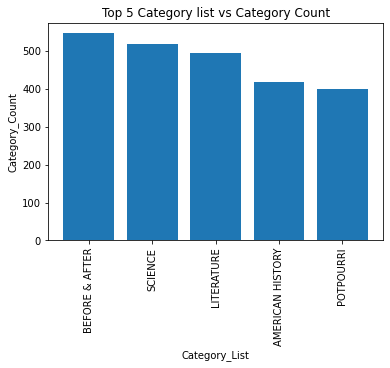

In [119]:
fig,ax=plt.subplots()
ax.bar(df_cat['Category_List'],df_cat['Category_Count'])
ax.set_xlabel("Category_List")
ax.set_ylabel("Category_Count")
ax.set_title("Top 5 Category list vs Category Count")
plt.xticks(rotation=90)
plt.show()